In [1]:
import warnings

warnings.filterwarnings('ignore')

import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

In [4]:
train_data_path = '/content/drive/MyDrive/Kaggle/dataset/train_validate'
validation_data_path = '/content/drive/MyDrive/Kaggle/dataset/test'

In [54]:
# Parameters

img_width, img_height = 64, 64
batch_size = 8
samples_per_epoch = 32
validation_steps = 16
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 2
lr = 0.0004
epochs = 70

In [55]:
default_model = Sequential()
default_model.add(Convolution2D(nb_filters1, (conv1_size, conv1_size), input_shape=(img_width, img_height, 3)))
default_model.add(Activation("relu"))
default_model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

default_model.add(Convolution2D(nb_filters2, (conv1_size, conv1_size)))
default_model.add(Activation("relu"))

default_model.add(Convolution2D(nb_filters2, (conv1_size, conv1_size)))
default_model.add(Activation("relu"))
default_model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

default_model.add(layers.Flatten())
default_model.add(layers.Dense(64, activation="relu" ))
# model.add(layers.Dense(32, activation="relu" ))

default_model.add(layers.Dense(2, activation="softmax" ))

default_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 27, 27, 64)       

In [56]:
default_model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) # optimizer=optimizers.RMSprop(lr=lr),

In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [58]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1700 images belonging to 2 classes.


In [60]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 320 images belonging to 2 classes.


In [61]:
"""
Tensorboard log
"""

log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

In [62]:
history = default_model.fit(train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)

Epoch 1/70
213/213 [==============================] - 8s 35ms/step - loss: 0.4937 - accuracy: 0.7887 - val_loss: 0.4308 - val_accuracy: 0.8672
Epoch 2/70
213/213 [==============================] - 7s 34ms/step - loss: 0.2504 - accuracy: 0.9027 - val_loss: 0.4407 - val_accuracy: 0.8594
Epoch 3/70
213/213 [==============================] - 7s 33ms/step - loss: 0.2398 - accuracy: 0.9083 - val_loss: 0.5186 - val_accuracy: 0.8125
Epoch 4/70
213/213 [==============================] - 7s 33ms/step - loss: 0.2374 - accuracy: 0.9099 - val_loss: 0.4347 - val_accuracy: 0.8125
Epoch 5/70
213/213 [==============================] - 7s 31ms/step - loss: 0.2141 - accuracy: 0.9118 - val_loss: 0.5205 - val_accuracy: 0.8359
Epoch 6/70
213/213 [==============================] - 7s 32ms/step - loss: 0.2606 - accuracy: 0.9025 - val_loss: 0.2389 - val_accuracy: 0.8906
Epoch 7/70
213/213 [==============================] - 7s 31ms/step - loss: 0.1902 - accuracy: 0.9307 - val_loss: 0.4030 - val_accuracy: 0.8672

In [63]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])
print('Final training val_loss \t', history.history['val_loss'][-1])
print('Final training val_accuracy ', history.history['val_accuracy'][-1])

Final training loss 	 0.09106803685426712
Final training accuracy  0.9717646837234497
Final training val_loss 	 0.4469505548477173
Final training val_accuracy  0.84375


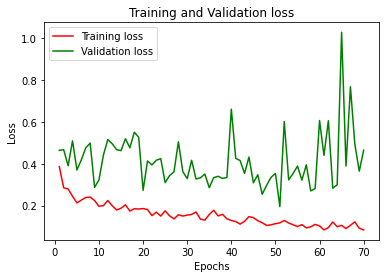

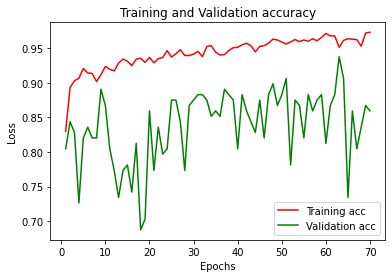

In [15]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

In [65]:
# https://github.com/keras-team/keras/issues/2607#issuecomment-310073729
filenames = validation_generator.filenames
nb_samples = len(filenames)

predict = default_model.predict(validation_generator, steps=nb_samples)
predicted_classes = np.argmax(predict, axis=1)

In [66]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
# print(report)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
masked         0.504854  0.325000  0.395437  160.000000
unmasked       0.502304  0.681250  0.578249  160.000000
accuracy       0.503125  0.503125  0.503125    0.503125
macro avg      0.503579  0.503125  0.486843  320.000000
weighted avg   0.503579  0.503125  0.486843  320.000000

In [67]:
df.drop(['f1-score', 'support'], axis=1, inplace=True)
df

precision    recall
masked         0.504854  0.325000
unmasked       0.502304  0.681250
accuracy       0.503125  0.503125
macro avg      0.503579  0.503125
weighted avg   0.503579  0.503125

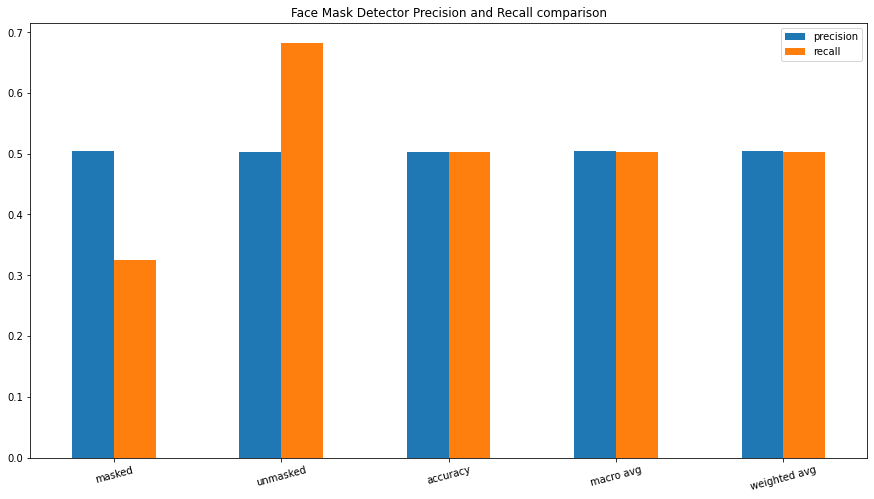

In [68]:
plt.rcParams['figure.figsize'] = (15, 8)
df[['precision', 'recall']].plot.bar(rot=15, title="Face Mask Detector Precision and Recall comparison")

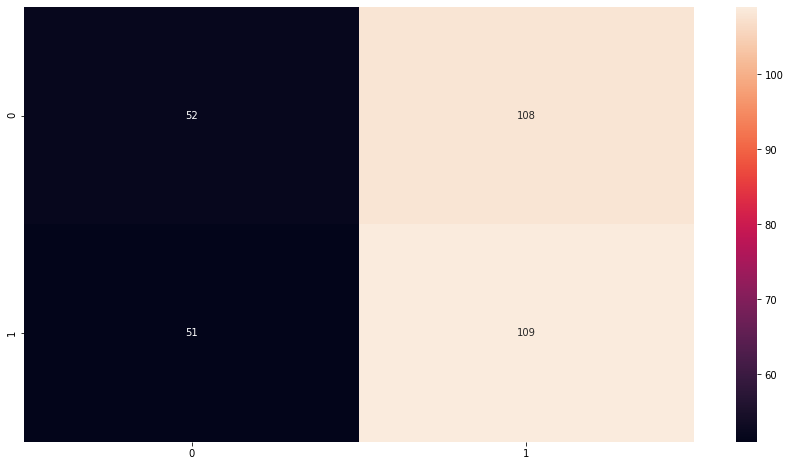

In [69]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 

sns.heatmap(confusion_mtx, annot=True, fmt="d")

#### Updating the default model 

In [36]:
train_datagen_mod = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode='nearest')


In [37]:
test_datagen_mod = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator_mod = train_datagen_mod.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

Found 1700 images belonging to 2 classes.


In [39]:
validation_generator_mod = test_datagen_mod.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=16,
    class_mode='categorical')

Found 320 images belonging to 2 classes.


In [40]:
improved_Model = Sequential()

improved_Model.add(Convolution2D((nb_filters1*2), (3, 3), input_shape=(img_width, img_height, 3)))
improved_Model.add(Activation("relu"))
improved_Model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

improved_Model.add(Convolution2D((nb_filters2 * 2), (conv1_size, conv1_size)))
improved_Model.add(Activation("relu"))
improved_Model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

improved_Model.add(Convolution2D(nb_filters2, (conv1_size, conv1_size)))
improved_Model.add(Activation("relu"))
improved_Model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

improved_Model.add(layers.Flatten())
improved_Model.add(layers.Dense(500, activation="relu" ))
# cnnModel.add(layers.Dropout(0.5))

improved_Model.add(layers.Dense(200, activation="relu" ))
# cnnModel.add(layers.Dropout(0.5))

improved_Model.add(layers.Dense(32, activation="relu" ))

improved_Model.add(layers.Dense(2, activation="softmax" ))

improved_Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)       

In [41]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

improved_Model.compile(loss='categorical_crossentropy',             #'mse',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
new_history = improved_Model.fit(train_generator_mod,
    epochs=10,
    validation_data=validation_generator_mod,
    validation_steps=validation_steps)

Epoch 1/10
54/54 [==============================] - 7s 124ms/step - loss: 0.5330 - accuracy: 0.7080 - val_loss: 0.7174 - val_accuracy: 0.7109
Epoch 2/10
54/54 [==============================] - 6s 121ms/step - loss: 0.2972 - accuracy: 0.8821 - val_loss: 0.5635 - val_accuracy: 0.7695
Epoch 3/10
54/54 [==============================] - 7s 126ms/step - loss: 0.2465 - accuracy: 0.9139 - val_loss: 0.4673 - val_accuracy: 0.7695
Epoch 4/10
54/54 [==============================] - 7s 133ms/step - loss: 0.2111 - accuracy: 0.9284 - val_loss: 0.6042 - val_accuracy: 0.7422
Epoch 5/10
54/54 [==============================] - 6s 120ms/step - loss: 0.2757 - accuracy: 0.9043 - val_loss: 0.4140 - val_accuracy: 0.8359
Epoch 6/10
54/54 [==============================] - 6s 120ms/step - loss: 0.2006 - accuracy: 0.9262 - val_loss: 0.3693 - val_accuracy: 0.8633
Epoch 7/10
54/54 [==============================] - 6s 120ms/step - loss: 0.1730 - accuracy: 0.9328 - val_loss: 0.3969 - val_accuracy: 0.8555
Epoch 

In [43]:
print('Final training loss for modified model\t', new_history.history['loss'][-1])
print('Final training accuracy for modified model\t', new_history.history['accuracy'][-1])
print('Final training val_loss for modified model\t', new_history.history['val_loss'][-1])
print('Final training val_accuracy for modified model\t', new_history.history['val_accuracy'][-1])

Final training loss for modified model	 0.15284463763237
Final training accuracy for modified model	 0.9429411888122559
Final training val_loss for modified model	 0.40127676725387573
Final training val_accuracy for modified model	 0.8515625


In [44]:
# https://github.com/keras-team/keras/issues/2607#issuecomment-310073729
filenames = validation_generator_mod.filenames
nb_samples = len(filenames)

predict_mod = improved_Model.predict(validation_generator_mod, steps=nb_samples)
predicted_classes_mod = np.argmax(predict_mod, axis=1)

mod_report = classification_report(true_classes, predicted_classes_mod, target_names=class_labels, output_dict=True)
# print(report)
mod_df = pd.DataFrame(mod_report).transpose()
mod_df

precision  recall  f1-score   support
masked         0.511905  0.5375  0.524390  160.0000
unmasked       0.513158  0.4875  0.500000  160.0000
accuracy       0.512500  0.5125  0.512500    0.5125
macro avg      0.512531  0.5125  0.512195  320.0000
weighted avg   0.512531  0.5125  0.512195  320.0000

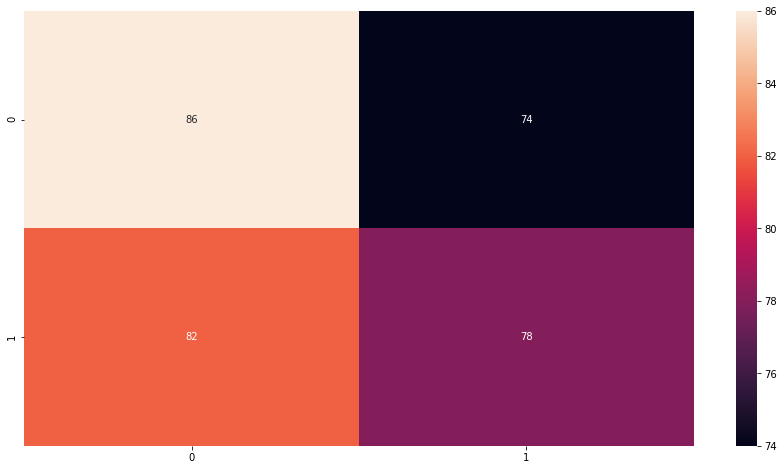

In [45]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes_mod) 

sns.heatmap(confusion_mtx, annot=True, fmt="d")

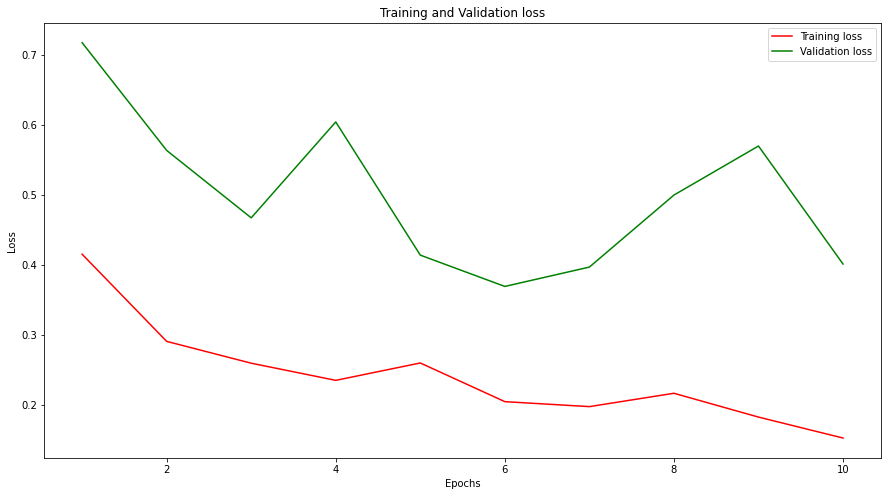

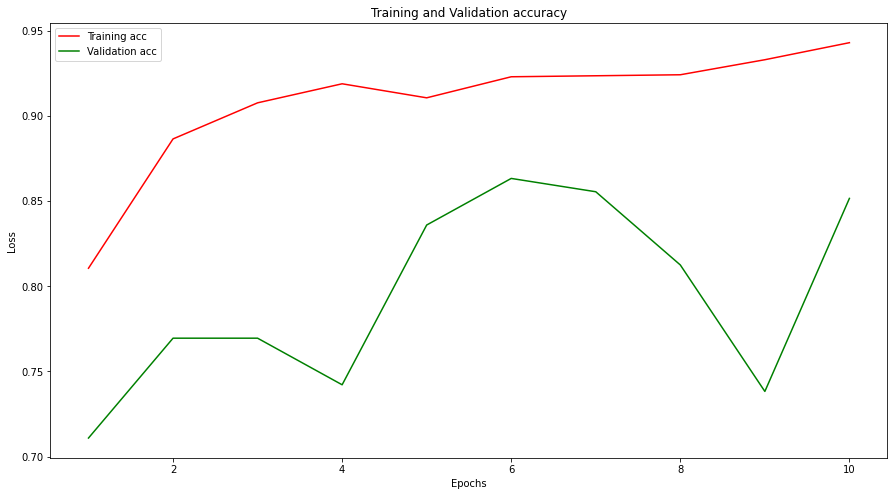

In [46]:
# plotting training and validation loss

loss = new_history.history['loss']
val_loss = new_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = new_history.history['accuracy']
val_acc = new_history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

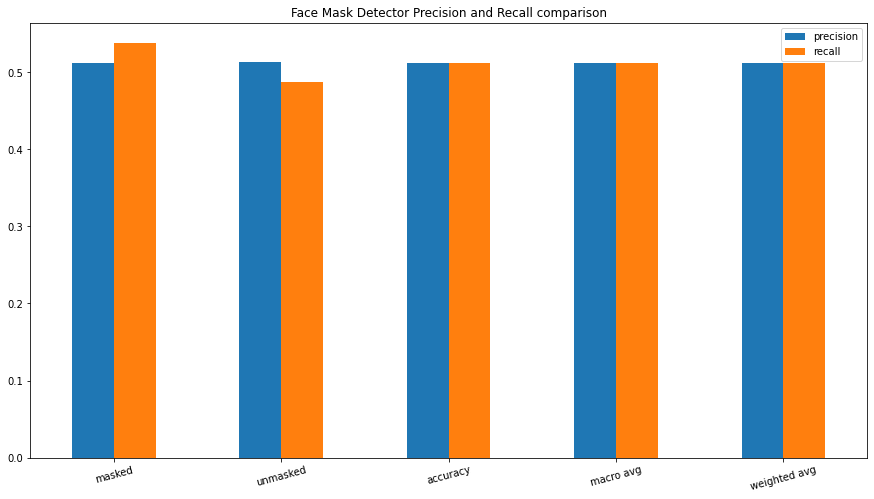

In [47]:
mod_df[['precision', 'recall']].plot.bar(rot=15, title="Face Mask Detector Precision and Recall comparison")

In [49]:
mod_df.drop(['f1-score', 'support'], axis=1, inplace=True)
mod_df

precision  recall
masked         0.511905  0.5375
unmasked       0.513158  0.4875
accuracy       0.512500  0.5125
macro avg      0.512531  0.5125
weighted avg   0.512531  0.5125

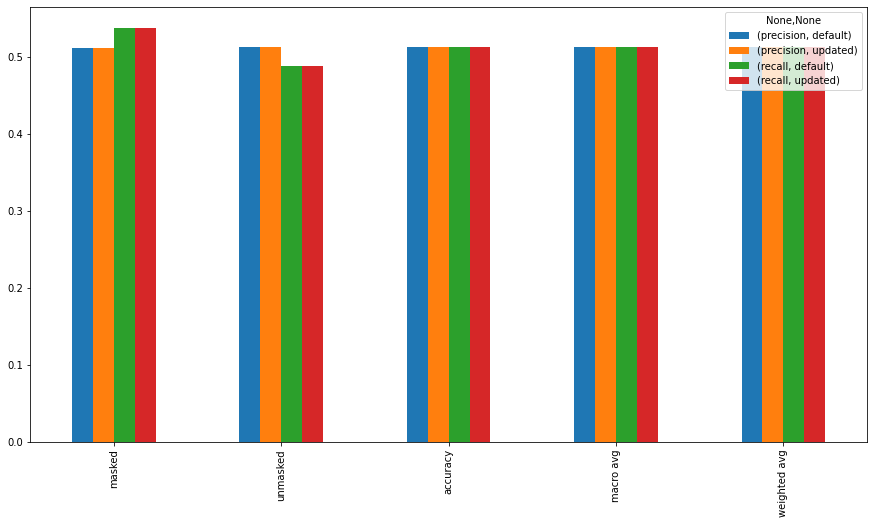

In [50]:
pd.concat([df, mod_df],keys=['default', 'updated']).unstack(0).plot(kind='bar')